In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
iris_df = data[['variety', 'sepal length (cm)', 'sepal width (cm)']]
iris_df

,variety,sepal length (cm),sepal width (cm)
0,0,5.1,3.5
1,0,4.9,3.0
2,0,4.7,3.2
3,0,4.6,3.1
4,0,5.0,3.6
...,...,...,...
145,2,6.7,3.0
146,2,6.3,2.5
147,2,6.5,3.0
148,2,6.2,3.4


In [11]:
data_train, data_test = train_test_split(iris_df, test_size=0.2, random_state=18)

y_train, y_test = data_train['variety'], data_test['variety']

del data_test['variety']
del data_train['variety']

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
lda.predict(data_test)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(result[0], result[1]))
print(lda.coef_)

accuracy =  0.7666666666666667
[[-5.74557666  8.25391356]
 [ 1.42398114 -3.58167227]
 [ 3.96311763 -4.08046199]]


In [ ]:
# Визуализируйте предсказания для тестовой выборки и центры классов
result_to_draw = data_test[:]
result_to_draw['variety'] = list(lda.predict(data_test))
plt.scatter(
    result_to_draw['sepal length (cm)'],
    result_to_draw['sepal width (cm)'],
    c=result_to_draw['variety']
)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=500, marker='*')

plt.show()

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [14]:
iris_classes = iris_df[:]
del iris_classes['variety']

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

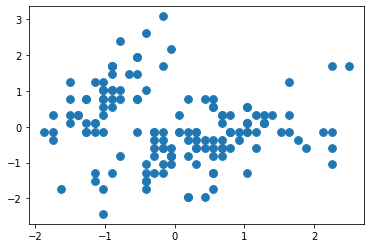

In [17]:
scaler = StandardScaler()
iris_sc = scaler.fit_transform(iris_classes)
plt.scatter(iris_sc[:, 0], iris_sc[:, 1],cmap='autumn', s=60)

In [19]:

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_sc)
    k_inertia.append(clf_kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


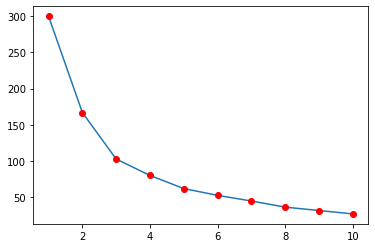

In [20]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

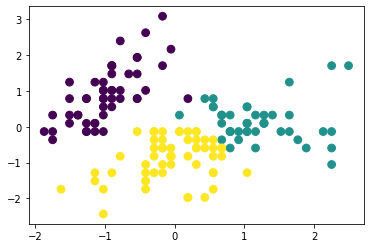

In [23]:
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию ( три кластера ответ)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(iris_sc)
clusters
plt.scatter(iris_sc[:, 0], iris_sc[:, 1],cmap='viridis', c=clusters, s=60)

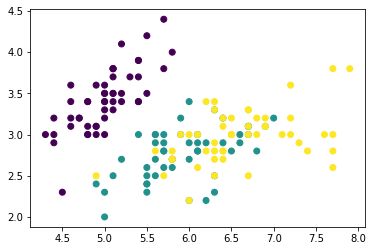

In [24]:
plt.scatter(
    iris_df['sepal length (cm)'],
    iris_df['sepal width (cm)'],
    cmap='viridis', c=iris_df['variety']
)